## Creating a linear regression algorithm from scratch

### Creating the best fit line

In [22]:
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt

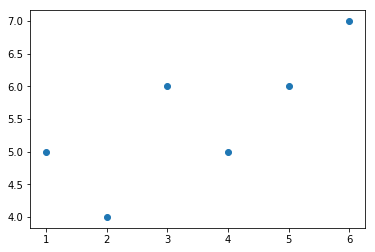

In [23]:
# Let's create some semi-linear data

xs = np.array([1,2,3,4,5,6], dtype = np.float64)
ys = np.array([5,4,6,5,6,7], dtype = np.float64)

plt.scatter(xs,ys)
plt.show()

We now want to find the best fit line. Remember that a straight line is of the form *y = mx + b*. We want to get m and b to create our line. This is how to do it in Python:

In [24]:
def best_fit_slope_and_intercept(xs,ys):
    m = ( ((mean(xs) * mean(ys)) - mean(xs * ys)) / 
         ((mean(xs) ** 2) - mean(xs**2)) )
    b = mean(ys) - m * mean(xs)
    return m, b

m, b = best_fit_slope_and_intercept(xs, ys)
print(m, b)

0.42857142857142866 4.0


In [25]:
# Now we create the actual line. This line then allows us to predict a new y value given an x value.
regression_line = [(m*x) + b for x in xs]

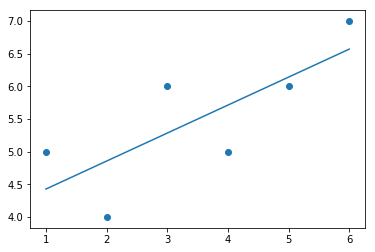

In [26]:
plt.scatter(xs, ys)
plt.plot(xs, regression_line)
plt.show()

In [27]:
predict_x = 8
predict_y = (m*predict_x) + b

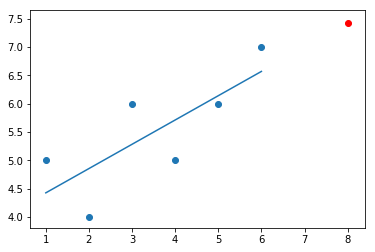

In [28]:
plt.scatter(xs, ys)
plt.scatter(predict_x, predict_y, color = 'red')
plt.plot(xs, regression_line)
plt.show()

### Testing the accuracy with R squared

To test the accuracy, we can use this formula: *a = error²*. We take the square of the error so that it's always positive, and also to penalize bigger errors.

In [29]:
# This is a well known method for calculating errors.
def squared_error(ys_original, ys_line):
    return sum((ys_line - ys_original) ** 2)

# Now that we've got the error, we can use the R squared method. Works like this: R² = 1 - ( (squared error with our line)/
#                                                                                            (squared error with the mean of all ys)
def coefficient_of_determination(ys_original, ys_line):
    y_mean_line = [mean(ys_original) for y in ys_original]
    squared_error_regression = squared_error(ys_original, ys_line)
    squared_error_y_mean = squared_error(ys_original, y_mean_line)
    return 1 - (squared_error_regression / squared_error_y_mean)

In [30]:
r_squared = coefficient_of_determination(ys, regression_line)
print(r_squared)

0.5844155844155845


In [31]:
import random

In [33]:
def create_dataset(hm, variance, step = 2, correlation = False):
    val = 1
    ys = []
    for i in range(hm):
        y = val + random.randrange(-variance, variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            val += step
        elif correlation and correlation == 'neg':
            val -= step
        xs = [i for i in range(len(ys))]
    return np.array(xs, dtype = np.float64), np.array(ys, dtype = np.float64)


In [54]:
xs, ys = create_dataset(100, 50, 2, correlation = 'pos')

def best_fit_slope_and_intercept(xs,ys):
    m = ( ((mean(xs) * mean(ys)) - mean(xs * ys)) / 
         ((mean(xs) ** 2) - mean(xs**2)) )
    b = mean(ys) - m * mean(xs)
    return m, b

m, b = best_fit_slope_and_intercept(xs, ys)
regression_line = [(m*x) + b for x in xs]

r_squared = coefficient_of_determination(ys, regression_line)
print(r_squared)

0.8248612006162408


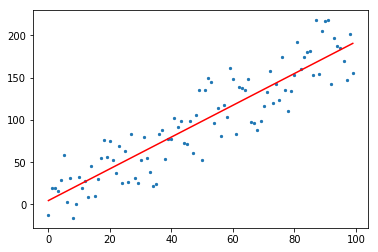

In [56]:
plt.scatter(xs, ys, s = 5)
plt.plot(xs, regression_line, color = 'red')
plt.show()